# Lab 2
## Machine Learning

## Today

* [Setup](#setup)
* [Dataframes](#dataframes)
* [Student Performance Dataset](#dataset)
* [Ordinary Least Squares Regression with the Closed Form Solution](#ols)

## Setup the environment <a class="anchor" id="setup"></a>

1. Open Your Terminal or Command Prompt
2. Activate Your Conda Environment - make sure it is active before running the installation commands below!
   `conda activate ml2025`
3. Install Matplotlib
   `conda install matplotlib`
4. Install statsmodel
   `conda install statsmodels`
5. Install pandas
   `conda install pandas`
6. Install sklearn
   `conda install scikit-learn`

(or `pip install packagename` if you don't use conda or conda install doesn't work for some reason)

A quick introduction to the packages we will use:  
- **NumPy (`np`)**: NumPy (Numerical Python) provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays. It is highly optimized for numerical computations and serves as the foundation for many other scientific computing libraries, including Pandas. NumPy's `ndarray` is the fundamental data structure, offering efficient operations like element-wise calculations, linear algebra, and statistical functions.  

- **Pandas (`pd`)**: Pandas is built on the NumPy package and its key data structure is called the **DataFrame**. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables. Pandas provides functions for data cleaning, transformation, and analysis, making it the primary package for handling structured datasets. Unless you are working with large datasets where efficiency is key, this is the main package for loading and managing data.  

- **Matplotlib (`plt`)**: Matplotlib is a powerful library for creating static, animated, and interactive visualizations in Python. It provides fine-grained control over plots, allowing users to create line charts, histograms, scatter plots, and more. The `pyplot` module (`plt`) is a commonly used interface that simplifies the process of creating and customizing plots. (Seaborn (`sns`) is a useful library built on top of Matplotlib for even nicer and more complex graphs.)  

- **Statsmodels (`sm`)**: Statsmodels is a library for estimating and testing statistical models. It provides tools for performing regression analysis, hypothesis testing, and statistical data exploration. Compared to Scikit-learn, which is optimized for predictive modeling, Statsmodels focuses more on statistical inference, offering detailed output on model parameters, significance tests, and confidence intervals.  

- **Scikit-learn (`sklearn`)**: Scikit-learn is one of the most widely used libraries for machine learning in Python. It provides efficient implementations of various machine learning algorithms, including regression, classification, clustering, and dimensionality reduction. In addition to modeling, scikit-learn includes utilities for data preprocessing, model selection, and evaluation, making it a comprehensive tool for building and testing predictive models. As sklearn is a huge package, we usually only import individual modules as we need them.

By combining these libraries, we can efficiently analyze data, visualize trends, and build statistical models.

### Importing packages

At the start of each notebook we must import the necessary libraries for the code to run.

You will notice that each of these packages are being installed as a shortened version of their name. This helps keep code short. In practice for common packages this is standardised, and almost everyone will used the same ones which I have included below so it's good to keep them as they are.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

As we have just installed these packages, it's a good practice to verify they has been successfully installed. 

In [2]:
print(np.__version__)
print(pd.__version__)
print(plt.matplotlib.__version__)
print(sm.__version__)

2.0.1
2.2.3
3.10.0
0.14.4


## Dataframes with pandas <a class="anchor" id="dataframes"></a>

Use the pandas cheat sheet to help you with the following excercises: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Let's create a DataFrame from a dictionary. Here, each key becomes a column in the DataFrame, and the values are the data entries for those columns. A dictionary is a built-in data type that stores collections of data as key-value pairs.

In [3]:
data_example = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}

df = pd.DataFrame(data_example)

#We can also do this directly in the DataFrame constructor but it's a bit more cumbersome:
#df = pd.DataFrame(data_example, columns=['Name', 'Age', 'City'], index=['a', 'b', 'c', 'd', 'e'], City=['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])

Display the data frame to make sure it worked:

In [4]:
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston
4,Eve,45,Phoenix


Select only the 'Name' and 'Age' Columns and display them:

In [6]:
df[['Name','Age']]

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35
3,David,40
4,Eve,45


Use .describe() to compute basic statistics for the numerical columns:

In [7]:
df.describe()

,Age
count,5.000000
mean,35.000000
std,7.905694
min,25.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,45.000000


Subset the DataFrame for people older than 30 and display it:

In [9]:
df.query('Age > 30')

,Name,Age,City
2,Charlie,35,Chicago
3,David,40,Houston
4,Eve,45,Phoenix


Add a new column called 'YearOfBirth' for the year of birth of the people in the dataset (assuming they have already had their birthdays):

In [14]:
df = df.assign(YearOfBirth = 2025-df['Age'])

In [15]:
df['YearOfBirth']

0    2000
1    1995
2    1990
3    1985
4    1980
Name: YearOfBirth, dtype: int64

In [16]:
df

,Name,Age,City,YearOfBirth
0,Alice,25,New York,2000
1,Bob,30,Los Angeles,1995
2,Charlie,35,Chicago,1990
3,David,40,Houston,1985
4,Eve,45,Phoenix,1980


## Student Performance Dataset <a class="anchor" id="dataset"></a>

The dataset used is the student performance dataset as discussed in the lecture this week. More information on the dataset can be found here: https://archive.ics.uci.edu/dataset/320/student+performance

We are going to focus on the students maths results rather than their portuguese results.

First read in the data from the CSV file into a pandas dataframe using pd.read_csv (the datset is called student-mat.csv):

(Hint: you will want to set `"sep=';'`, as this is the seperator used in the data)

In [19]:
data = pd.read_csv('student-mat.csv', sep=';')

Now we print the shape of our data to see its dimensions.

In [20]:
print(data.shape)

(395, 33)


The data has should have 395 samples and 34 features.

Another useful function in pandas for seeing some overview information about datasets is .head(). This prints the first 5 rows of our data. Try it with our data:

In [21]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Checking for Missing Data

We can run the following code to check for NA values. 

(There are some subtle differences between `null` which is the default in python, `nan` (Not a Number) from NumPy and the new `pd.NA` value specific to pandas, for our case it's mostly plenty to treat all as missing values, the vast majority you will encounter will be `null`, so that's what we will use.)

In [22]:
feat_miss = data.columns[data.isnull().any()]

print(feat_miss)
feat_miss.shape

Index([], dtype='object')


(0,)

Luckily in this case we don't have any missing data. We will look at missingness and imputation in future labs however, as most Machine Learning algorithms are not able to natively handle missing values, and many datasets contain them.

### Summary Statistics:


We want to see some of the headline information about our data before we analyse it. For this we can use the .describe() function we learned above.

In [23]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


This gives us the following info:

count: The number of non-missing (non-NaN) values.

mean: The mean of the values.

std: The standard deviation of the values.

min: The minimum value.

25%: The 25th percentile (first quartile).

50% (median): The median of the data.

75%: The 75th percentile (third quartile).

max: The maximum value.

We can also specify percentiles other than the default values of 25, 50, 75:

In [24]:
custom_percentiles = data.describe(percentiles=[.20, .40, .60, .80])
print(custom_percentiles)

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
20%     15.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
40%     16.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
60%     17.000000    3.000000    3.000000    1.000000    2.000000    0.000000   
80%     18.000000    4.000000    4.000000    2.000000    3.000000    1.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.0000

Let's plot the distribution of the final grade G3

<Axes: >

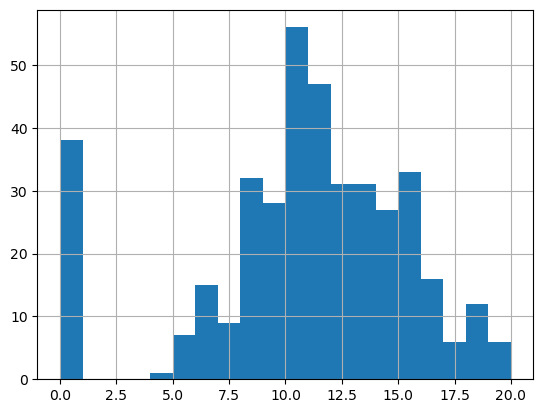

In [25]:
data['G3'].hist(bins=20)

The plot above just used a simple line of code, but using matplotlib we can make much more impressive graphs. Below is an example of using matplotlip to create a scatter plot of G1 vs G3.

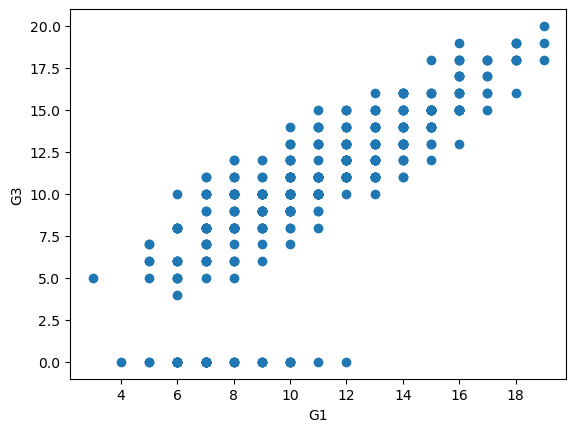

In [26]:
plt.scatter(data['G1'], data['G3'])
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

Use matplotlib to make some more plots of the data to try discover some interesting patterns. See if you can get creative with multiple variables, colours etc.

Here is a cheatsheet for matplotlib: https://matplotlib.org/cheatsheets/cheatsheets.pdf


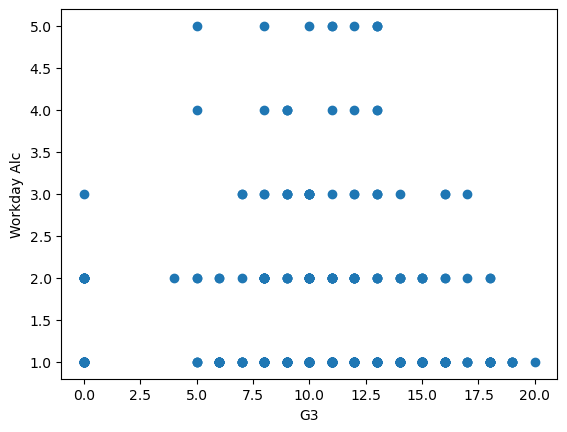

In [37]:
plt.scatter(data['G3'],data['Dalc'])
plt.ylabel('Workday Alc')
plt.xlabel("G3")
plt.show()

### Splitting the data into training and test sets

First we want to split our data into seperate dataframes for X and Y. This is common practice as many of the machine learning algorithms we use as well as regularisation and imputation functions will expect the data split up. It is very important to keep track of both and ensure they still match after any preprocessing. If your X values no longer align with your Y targets you will get very wrong results!

For this case we want to do a very simple regression so we use the final year grade as our target variable, and first period grade as our only explanatory variable to start.

In [39]:
X = data['G1'].values
y = data['G3'].values

#As we have a single feature, we need to reshape it to a 2D array or some of our functions will give errors.
X= X.reshape(-1, 1)
y = y.reshape(-1, 1)

The **from sklearn.model_selection import train_test_split** command imports the train_test_split function from scikit-learn specifically, which is used to split the dataset into training and test sets.

In [41]:
from sklearn.model_selection import train_test_split

Setting the Random Seed: **seed = 0** sets the seed for the random number generator to 0. This ensures that the results are reproducible; anyone running this code with the same dataset and seed will get the same split of data. Generally this should be set at the start of your notebook.

Splitting the Dataset: The code below splits the features (X) and the target variable (y) into training and test sets. 20% (test_size = 0.2) of the data is allocated to the test set, while the remaining 80% is used for training the model.
The random_state = seed parameter ensures that the split is reproducible.

In [60]:
seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(395, 1)
(395, 1)
(316, 1)
(316, 1)
(79, 1)
(79, 1)


### Standardization:
Standardization refers to the process of transforming each feature in your data so that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of each feature and then dividing by the standard deviation for each feature. The formula used is:

z=(x-μ)/σ
Here, x is the original feature value
μ is the mean of the feature, and 
σ is the standard deviation of the feature.

This is very useful for machine learning because it can speed up convergence, enhance numerical stability and prevent features from dominating. The main downside is that it makes interpretation harder, but as we are only concerned with prediction that's not an issue for us! 

To do this follow the following steps:

1. Importing StandardScaler:**from sklearn.preprocessing import StandardScaler** imports the StandardScaler class, which provides the functionality to standardize features.

2. Creating a StandardScaler Instance: **sc = StandardScaler()** creates an instance of StandardScaler. This instance will then be used to compute the mean and standard deviation for each feature in the dataset, and by keeping the same instance across the testing and training sets we ensure consistancy.
   
3. Fitting and Transforming the Training Data: **X_train = sc.fit_transform(X_train)** computes the mean and standard deviation of each feature in the training set X_train, and then standardizes the training set by applying the transformation z=(x-μ)/σ. (​The fit_transform method is a combination of fit (to compute the scaling parameters) and transform (to apply the standardization).) The standardized training data is then reassigned to X_train.

4. Transforming the Testing Data: **X_test = sc.transform(X_test)** applies the same transformation to X_test using the mean and standard deviation calculated from the training set. It's crucial to use the parameters from the training set to ensure the model evaluates on the same scale. The standardized test data is reassigned to X_test.


In [61]:

from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()

In [63]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Ordinary Least Squares Regression with the Closed Form Solution <a class="anchor" id="ols"></a>:

Using the X_train and y_train vectors, calculate the coefficients for a simple OLS Regression by performing the matrix operations for the closed form solution we learned in class.

Hint: In order for us to have an intercept in the regression (usually this is something we want), you will have to add a column of ones to X_train. You can do this with the code `X_train = np.hstack((np.ones_like(y_train), X_train))`


In [64]:
X_train = np.hstack((np.ones_like(y_train), X_train))

In [79]:
# beta_hat = ( X.transpose * X ) ^ -1 * X.transpose y
beta_hat =  np.linalg.inv( np.transpose(X_train) @ X_train ) @ np.transpose(X_train) @ y_train

In [80]:
beta_hat

array([[10.47468354],
       [ 3.45835217]])

Use these coefficients to caclulate the predicted y-values.

Hint: You will once again have to add a vector of ones

In [81]:
X_test = np.hstack((np.ones_like(y_test), X_test))

In [84]:
X_test

array([[ 1.        ,  0.94725679],
       [ 1.        ,  0.0271754 ],
       [ 1.        , -0.58621219],
       [ 1.        ,  1.56064438],
       [ 1.        ,  1.25395058],
       [ 1.        ,  0.64056299],
       [ 1.        ,  0.3338692 ],
       [ 1.        , -0.2795184 ],
       [ 1.        , -0.89290599],
       [ 1.        ,  1.56064438],
       [ 1.        , -0.89290599],
       [ 1.        ,  0.0271754 ],
       [ 1.        ,  0.0271754 ],
       [ 1.        , -1.19959979],
       [ 1.        ,  0.94725679],
       [ 1.        ,  0.94725679],
       [ 1.        , -0.2795184 ],
       [ 1.        , -0.58621219],
       [ 1.        , -0.2795184 ],
       [ 1.        ,  0.94725679],
       [ 1.        , -1.50629358],
       [ 1.        , -1.50629358],
       [ 1.        , -1.19959979],
       [ 1.        ,  0.64056299],
       [ 1.        ,  0.3338692 ],
       [ 1.        ,  1.25395058],
       [ 1.        , -0.58621219],
       [ 1.        ,  2.17403197],
       [ 1.        ,

In [97]:
y_pred = X_test @ beta_hat

Bonus: It's even better to define a function to do this. Can you make one which takes X_train and y_train as inputs and gives the betas and the predictions as outputs.

In [98]:
y_pred - y_test


array([[-2.49368882e-01],
       [ 5.68665647e-01],
       [-5.52644667e-01],
       [ 8.71941432e-01],
       [-1.18871372e+00],
       [ 6.89975961e-01],
       [-2.37067920e+00],
       [-1.49198951e+00],
       [-1.61329982e+00],
       [ 8.71941432e-01],
       [-2.61329982e+00],
       [-4.31334353e-01],
       [ 5.68665647e-01],
       [-1.67395498e+00],
       [-1.24936888e+00],
       [-2.49368882e-01],
       [-2.49198951e+00],
       [ 8.44735533e+00],
       [-4.91989510e-01],
       [-2.24936888e+00],
       [ 5.26538986e+00],
       [ 5.26538986e+00],
       [-1.67395498e+00],
       [-3.31002404e+00],
       [-3.70679196e-01],
       [-1.88713725e-01],
       [-1.55264467e+00],
       [-1.00674825e+00],
       [ 1.05686656e+01],
       [-4.49198951e+00],
       [ 4.20473470e+00],
       [-2.61329982e+00],
       [ 4.47355333e-01],
       [ 1.26538986e+00],
       [ 7.50631118e-01],
       [ 1.62932080e+00],
       [-3.49198951e+00],
       [-1.06740341e+00],
       [-6.1

### Calculate Coefficients using Statsmodels

Now we will use statsmodels inbuilt functionalities to calculate fit the model and calculate the predictions. I have included the code here, run it and make sure you understand it as many of the different models we will fit in this course will use similar syntax.

In [99]:
# We can also add intercept terms using statsmodels.
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Define and fit the model
model = sm.OLS(y_train, X_train_sm).fit()

# Predictions using statsmodels
predictions_statsmodels = model.predict(X_test_sm)

In [101]:
print("Coefficients from closed-form solution:", beta_hat)
print("Coefficients from statsmodels:", model.params)

Coefficients from closed-form solution: [[10.47468354]
 [ 3.45835217]]
Coefficients from statsmodels: [10.47468354  3.45835217]


If everything went well they should be the same.

#### Calculate MSE for the Models:


Now let's calculate the MSE for the models using the mean_squared_error function from sklearn.metrics. It takes the form: `mean_squared_error(y_test, predictions_from_model)`

In [105]:
from sklearn.metrics import mean_squared_error
MSE_statsmodels = mean_squared_error(y_test, predictions_statsmodels)
MSE_closedform = mean_squared_error(y_test, y_pred)
print("MSE of statsmodel", MSE_statsmodels)
print("MSE_closedform", MSE_closedform)

MSE of statsmodel 8.38800753657445
MSE_closedform 8.38800753657445


### Higher Dimensions

We will now create polynomials of X_train and X_test to fit a polynomial regression model. We will use the PolynomialFeatures class from scikit-learn to create the polynomial features. See if you can figure out how to use this function to add the polynomial expansion of our explanatory variable even better if you can make a fucntion to do this.

In [110]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit_transform(X_train)

array([[ 1.        ,  1.        , -0.2795184 ,  1.        , -0.2795184 ,
         0.07813053],
       [ 1.        ,  1.        , -0.89290599,  1.        , -0.89290599,
         0.79728111],
       [ 1.        ,  1.        , -0.58621219,  1.        , -0.58621219,
         0.34364474],
       ...,
       [ 1.        ,  1.        ,  0.64056299,  1.        ,  0.64056299,
         0.41032095],
       [ 1.        ,  1.        ,  2.48072577,  1.        ,  2.48072577,
         6.15400035],
       [ 1.        ,  1.        ,  0.64056299,  1.        ,  0.64056299,
         0.41032095]])

Now we can try create a plot of the mse values for each polynomial degree from 1 to 15.

In [ ]:
for i in range(16):
    poly = PolynomialFeatures(i)
    poly.fit_transform(X_train)
    plt.plot(i, )

Lets plot the polynomial regression model with degree 5, and compare it with the linear regression model.

Based on the above graphs what do you think the best function for the relationship is? Are our polynomial terms adding value?

Bonus: If you have time, try add some of the numerical variables we left out of X back in and see if you can make a better function.